In [1]:
# 라이브러리 설치
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/3f/fd/c2e7bb547b5b96c7bd536b4a80c4564b7ce5cd38d10095fbba8648996ab9/selenium-4.18.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/14/fb/9299cf74953f473a15accfdbe2c15218e766bae8c796f2567c83bae03e98/trio-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643ec0a62/outcome-1.3.0.post0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for wsproto>=0.14 from https://files.pythonhosted.org/packages/78/58/e860788190eba3bcce367f74d29c4675466ce8dddfba85f7827588416f01/wspro


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from selenium import webdriver

In [5]:
driver=webdriver.Chrome()

In [6]:
# 웹 드라이버의 주소창에 주소를 입력하고 요청을 보낸다
driver.get("https://www.naver.com")

In [8]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [10]:
# 브라우저에 있는 태그들 들 중에 id가 query인 태그를 선택
element=driver.find_element(By.ID,'query')
# driver.find_element(webdriver.common.by.By.ID, 'query')

In [11]:
# 검색어창에 특정 문자열을 입력
element.send_keys("휴일")

In [14]:
element.send_keys(Keys.ENTER)

In [19]:
element2=driver.find_element(By.XPATH, '//*[@id="fdr-54e4c37df0104b47b7ac4d9ebe835d61"]/div/div/div[2]/div[1]/div[2]/div[1]/div/a[1]')

In [20]:
element2.click()

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/122.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="휴일 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'휴일\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'휴일\'의 네이버 통합검색 결과입니다."> <title>휴일 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240222.css"> <lin
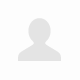
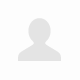

In [17]:
# 드라이버에 있는 패키지 소스
driver.page_source

In [18]:
from bs4 import BeautifulSoup as bs

In [21]:
soup=bs(driver.page_source, 'html.parser')

In [22]:
soup.find('title')

<title>휴일 : 네이버 통합검색</title>

In [23]:
# 웹브라우저에서 탭의 주소들을 확인
driver.window_handles

['BF87181BC557491D77FDBCBE71CBECE2',
 '284FF34DC16AFF74CA47134BF1828D51',
 'D1122E30F40339D7E82F2C524291167D',
 '6F7F2AA48991DF1711404429CD1CB8F9']

In [24]:
# 두번째 탭으로 이동
driver.switch_to.window(driver.window_handles[1])

In [25]:
soup2=bs(driver.page_source, 'html.parser')

In [26]:
soup2.find('title')

<title>2024 휴일 : 네이버 블로그</title>

In [27]:
soup2.find('div', attrs={
    'class':'se-main-container'
})

In [29]:
soup2.find('iframe')['src']

'/PostView.naver?blogId=twi_gim&logNo=223316318045&redirect=Dlog&widgetTypeCall=true&topReferer=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D0%26ie%3Dutf8%26query%3D%25ED%259C%25B4%25EC%259D%25BC&directAccess=false'

In [34]:
url= "https://blog.naver.com"+ soup2.find('iframe')['src']

In [32]:
import requests

In [36]:
res=requests.get(url)

In [37]:
soup3=bs(res.text, 'html.parser')

In [38]:
soup3


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-302536573_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon">
<meta content="2024 휴일" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyNDAxMDhfMjIx/MDAxNzA0NzA4MzQ0NjA5.fn_0wDCzE6tai7cl6JKNXgzOoORPfrC2_jfHmqZ5xrYg.delnmk0NsVd0Zd9lGgSHU5O8zieXusIT8p3tszmT158g.JPEG.seo_2966/2024_%2C_1.jpg?type=w2" property="og

In [46]:
imgs=soup3.find_all('img',attrs={
    'class':'se-image-resource'
})

In [47]:
len(imgs)

11

In [48]:
imgs

[<img alt="" class="se-image-resource" data-height="803" data-lazy-src="https://postfiles.pstatic.net/MjAyNDAxMDhfMjIx/MDAxNzA0NzA4MzQ0NjA5.fn_0wDCzE6tai7cl6JKNXgzOoORPfrC2_jfHmqZ5xrYg.delnmk0NsVd0Zd9lGgSHU5O8zieXusIT8p3tszmT158g.JPEG.seo_2966/2024_,_1.jpg?type=w966" data-width="886" src="https://postfiles.pstatic.net/MjAyNDAxMDhfMjIx/MDAxNzA0NzA4MzQ0NjA5.fn_0wDCzE6tai7cl6JKNXgzOoORPfrC2_jfHmqZ5xrYg.delnmk0NsVd0Zd9lGgSHU5O8zieXusIT8p3tszmT158g.JPEG.seo_2966/2024_,_1.jpg?type=w80_blur">
 </img>,
 <img alt="" class="se-image-resource" data-height="1029" data-lazy-src="https://postfiles.pstatic.net/MjAyNDAxMDhfMjg2/MDAxNzA0NzA4NTc1ODcx.rsgPVSl3d1L2CWAnD29zvyf96IiZo3DnoVdbRpPUSkAg.qYtJJjsOENKUBJMpYIMS7A-I0sMeFj2CWpK2c3O_5S8g.JPEG.seo_2966/2024_,_2.jpg?type=w966" data-width="886" src="https://postfiles.pstatic.net/MjAyNDAxMDhfMjg2/MDAxNzA0NzA4NTc1ODcx.rsgPVSl3d1L2CWAnD29zvyf96IiZo3DnoVdbRpPUSkAg.qYtJJjsOENKUBJMpYIMS7A-I0sMeFj2CWpK2c3O_5S8g.JPEG.seo_2966/2024_,_2.jpg?type=w80_blur">
 </img>,

In [49]:
list(
    map(
        lambda x:x['src'],
        imgs
    )
)

['https://postfiles.pstatic.net/MjAyNDAxMDhfMjIx/MDAxNzA0NzA4MzQ0NjA5.fn_0wDCzE6tai7cl6JKNXgzOoORPfrC2_jfHmqZ5xrYg.delnmk0NsVd0Zd9lGgSHU5O8zieXusIT8p3tszmT158g.JPEG.seo_2966/2024_,_1.jpg?type=w80_blur',
 'https://postfiles.pstatic.net/MjAyNDAxMDhfMjg2/MDAxNzA0NzA4NTc1ODcx.rsgPVSl3d1L2CWAnD29zvyf96IiZo3DnoVdbRpPUSkAg.qYtJJjsOENKUBJMpYIMS7A-I0sMeFj2CWpK2c3O_5S8g.JPEG.seo_2966/2024_,_2.jpg?type=w80_blur',
 'https://postfiles.pstatic.net/MjAyNDAxMDhfMzYg/MDAxNzA0NzA4ODIwNzY5.hAhvvh-7nWP2L6t6k82kU9pRNGKNmB-FLl5VZld60D8g.OT9ueomkAz3Hq4kdH3OGzSI58C5Pb104pcZWz4QA8R4g.JPEG.seo_2966/2024_,_3.jpg?type=w80_blur',
 'https://postfiles.pstatic.net/MjAyNDAxMDhfMjU5/MDAxNzA0NzA5MDI0ODM1.p1t0aIx8lMk743KjrWLw_6_N1MJIVVnAO4HIszSvoM8g.gcIYZyx_cjoifO1rpwXx3snY8S8zPV92S28WZPklA3Ig.JPEG.seo_2966/2024_,_4.jpg?type=w80_blur',
 'https://postfiles.pstatic.net/MjAyNDAxMDhfMjkz/MDAxNzA0NzA5MjEzMTA1.4Z4C6ZA9Z4tnlNMft1zMvhEPiWhmFKM8sDp3cfQ--a0g.jj_jXPk4NGjZcZd1X8PZAowPB3tZfZ80ezXwl22O4lcg.JPEG.seo_2966/2024_,_5.jpg?t